<h3 align='center'>IBM Data Science &ndash; Capstone Project

<h1 align='center'>Traffic accident severity prediction by Machine Learning

<h3 align='center'>Danh Nguyen

___

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Importing data
df = pd.read_csv("../Capstone_Data/NCDB_1999_to_2014.csv")
print("Data Imported")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,2,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Data Imported


In [3]:
df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3


In [4]:
df.shape

(5860405, 22)

<h2>Methodology

___

The dataset provides detail information of the accidents, grouping into logical groups, i.e. vehicle data, person data,... (details in drivingLegend.pdf). The target data that we want to predict is collision severity (C_SEV), which has 2 desired outcome: 1, 2 as fatal and non-fatal respectively.

From these data, we will use different machine learning algorithm to predict the outcome of the accidents, based on our hypothesis. Details below:

* For the vehicle data group, we hypothesize that the year model greatly affect the survivability of the accident. As the newer the vehicle, the better safety it has. A logistic regression is suitable for this as it provides the probability of fatality.

* For the road and weather condition group, we will see which combinations between evironment conditions will produce fatality. We hypothesize that for specific sets of condition should produce same result. This is a perfect use of a decision tree. The tree will reduce "entropy" after each node; given enough data, we can build a very accurate model.

<h2>Prediction from vehicle year model

___

*  <h3>&nbsp;Data preprocessing:

In [57]:
# we get a sub-data frame consist of type, year model, severity
vh_df = df[['V_YEAR', 'C_SEV']]
vh_df.head()
vh_df.shape

(5860405, 2)

In [58]:
# Dropping non applicable data
# vh_df = vh_df[~vh_df['V_TYPE'].isin(['UU', 'QQ', 'NN', 'XX'])]
vh_df = vh_df[~vh_df['V_YEAR'].isin(['UUUU', 'QQQQ', 'NNNN', 'XXXX'])]

In [59]:
vh_df.shape

(5276027, 2)

In [60]:
# define X, y for training
X = vh_df[['V_YEAR']].to_numpy()
y = vh_df[['C_SEV']].to_numpy()

In [61]:
# Normalizing dataset
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.19],
       [-1.62],
       [-1.62],
       [-1.76],
       [-2.04]])

*  <h3>&nbsp; Train/test split:

&nbsp; &nbsp; &nbsp; &nbsp; As the data set is massive and we have good evidence that the model will perform
well will small training data set, the test set will be 70% total data pool.

In [62]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=7312)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4220821, 1) (4220821, 1)
Test set: (1055206, 1) (1055206, 1)


*  <h3>&nbsp; Modeling:

In [63]:
# Applying Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.001, solver='liblinear').fit(X_train,y_train)
LR

C:\Users\huuda\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=0.001, solver='liblinear')

In [64]:
yhat = LR.predict(X_test)
yhat.size

1055206

*  <h3>&nbsp; Evaluation:

In [65]:
from sklearn import metrics
metrics.accuracy_score(y_test, yhat)

0.9834904274615572

The model predicts with 98.352% accuracy

In [66]:
np.unique(y_test, return_counts=True)

(array([1, 2], dtype=int64), array([  17421, 1037785], dtype=int64))

In [67]:
np.unique(yhat, return_counts=True)

(array([2], dtype=int64), array([1055206], dtype=int64))

*  <h3>&nbsp; Visualization:

In [68]:
# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [69]:
print(confusion_matrix(y_test, yhat, labels=[1, 2]))

[[      0   17421]
 [      0 1037785]]


Confusion matrix, without normalization
[[      0   60319]
 [      0 3607215]]


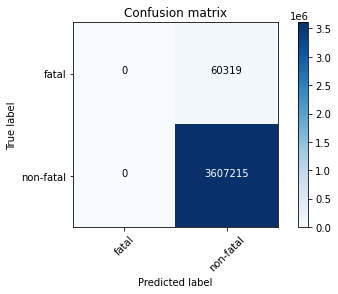

In [17]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['fatal','non-fatal'],normalize= False,  title='Confusion matrix')

The confusion matrix shows that the model has 60453 false positive and 0 cases false negative.
This is especially important in predicting-unwanted-outcome-scenarios.

&nbsp; &nbsp; &nbsp; &nbsp; As we see above the Logistic Regression model predicts  extremely well the fatality of a collision. This can follow the simple logic that newer cars should come with better safety systems. This drastically brings down the fatality rate, hence, produce a very high accuracy in our model.

&nbsp; &nbsp; &nbsp; &nbsp; But this information is so intuitive and easy to tell since thew correlation between year of production and fatality rate is obvious, as people driving older cars are putting themselves through greater danger. So the next question is, can we do better?

___

<h2>Prediction from environment conditions:

*  <h3>&nbsp; Data preprocessing:

In [18]:
# Querrying neccessary data: Weather condition, Road surface, Road alignment, Traffic control, and severity
env_df = df[['C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'C_SEV']]
env_df.head()

,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,C_SEV
0,UU,1,5,3,03,2
1,UU,1,5,3,03,2
2,UU,1,5,3,03,2
3,UU,5,3,6,18,2
4,UU,5,3,6,18,2


In [19]:
env_df.shape

(5860405, 6)

In [20]:
# Dropping non-applicable data
for x in ['C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF']:
    env_df = env_df[~env_df[x].isin(['U', 'X', 'Q', 'UU', 'XX', 'QQ'])]

In [21]:
env_df.shape

(4839324, 6)

We lose a significant amount of data due to non-applicable cases, hence, we have to adjust train/test split accordingly.

*  <h3>&nbsp; Train/test split:

In [22]:
X = env_df[['C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF']].to_numpy()
X[0:5]

array([['01', '1', '1', '1', '06'],
       ['01', '1', '1', '1', '06'],
       ['02', '1', '1', '1', '01'],
       ['02', '1', '1', '1', '01'],
       ['02', '1', '1', '1', '01']], dtype=object)